In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import hsv_to_rgb

In [21]:
folder = 'D:/AMAURY/experimental_processed/these_4polar_MFM/first_test'

In [22]:
frame, x, y, z, N_photons, offset_proj, rho, eta, delta, score, x_start, y_start, z_start, rho_start, delta_start = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
for filename in os.listdir(folder):
    data = np.load(rf"{folder}\{filename}")
    frame = np.concatenate((frame, data['frame']))
    x = np.concatenate((x, data['x']))
    y = np.concatenate((y, data['y']))
    z = np.concatenate((z, data['z'])) 
    N_photons = np.concatenate((N_photons, data['N_photons']))
    rho = np.concatenate((rho, data['rho']))
    eta = np.concatenate((eta, data['eta']))
    delta = np.concatenate((delta, data['delta']))
    score = np.concatenate((score, data['score']))
    x_start = np.concatenate((x_start, data['x_start']))
    y_start = np.concatenate((y_start, data['y_start']))
    z_start = np.concatenate((z_start, data['z_start']))    
    rho_start = np.concatenate((rho_start, data['rho_start']))
    delta_start = np.concatenate((delta_start, data['delta_start']))
    offset_proj = np.concatenate((offset_proj, np.array([data['offset_proj']])))
frame = np.array(frame)
x = np.array(x)
y = np.array(y)
z = np.array(z)
N_photons = np.array(N_photons)
rho = np.array(rho)
eta = np.array(eta)
delta = np.array(delta)
score = np.array(score)
rho_start = np.array(rho_start)
delta_start = np.array(delta_start)
z_start = np.array(z_start)
x_start = np.array(x_start)
y_start = np.array(y_start)
offset_proj = np.array(offset_proj)

(np.float64(2191.5333560478684),
 np.float64(25135.659492073057),
 np.float64(256.7196929996459),
 np.float64(14424.433365887777))

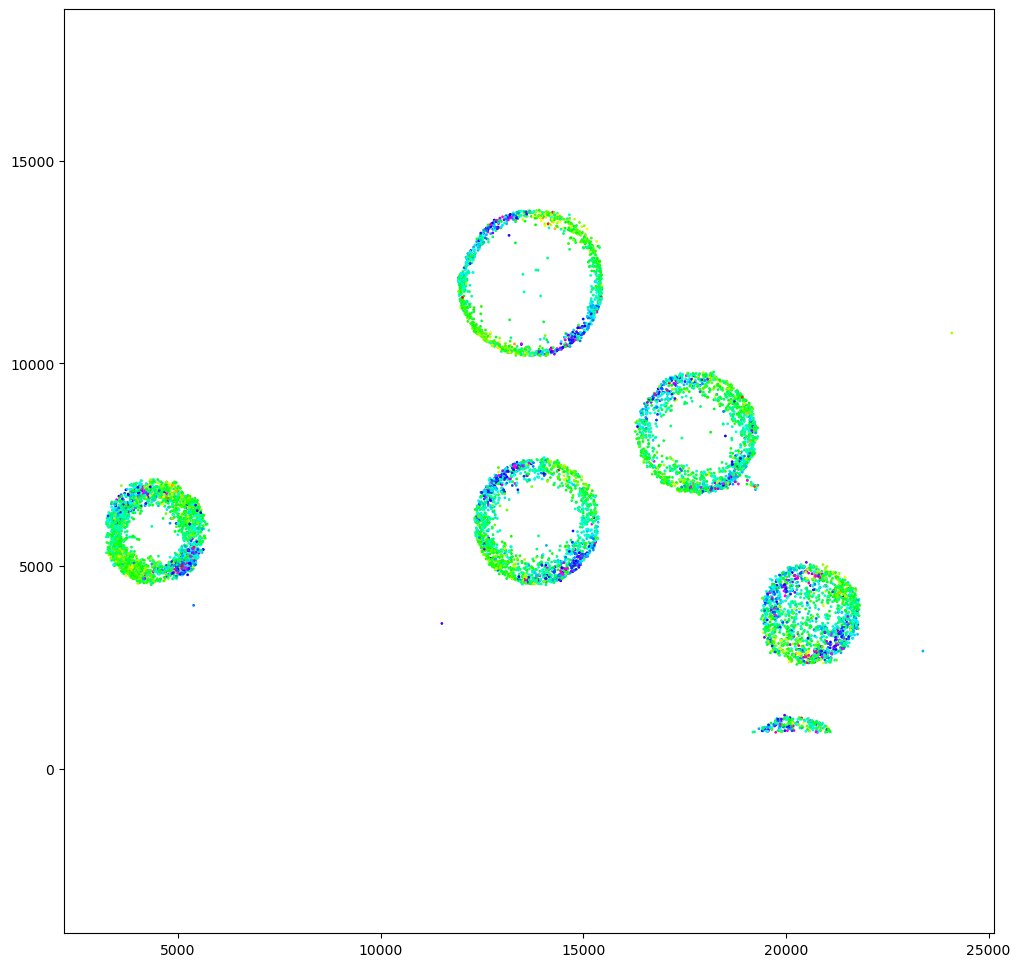

In [23]:
plt.rcParams['figure.figsize'] = [12,12]
hues = rho / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)

rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x , y , c = rgb_colors, s=1)
plt.axis('equal')

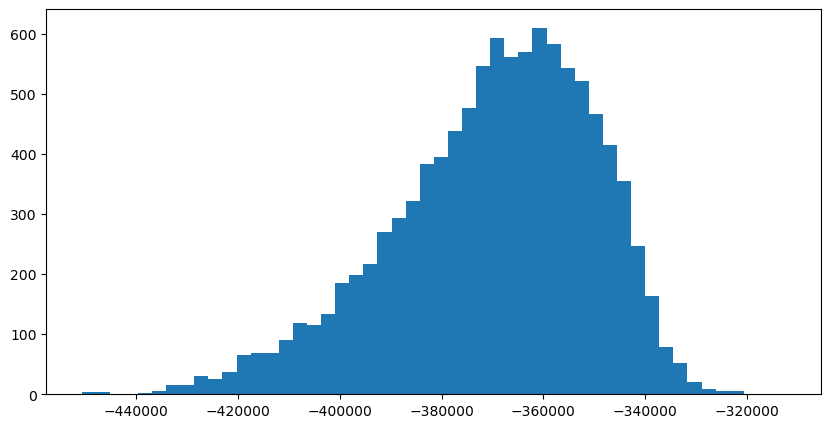

In [24]:
plt.rcParams['figure.figsize'] = [10,5]
hist = plt.hist(score, bins=50)

(0.0, 60000.0)

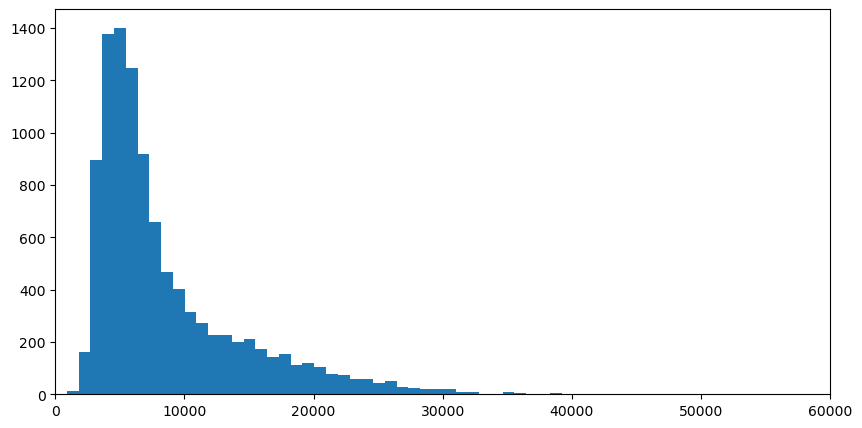

In [25]:
hh = plt.hist(N_photons, bins=100)
plt.xlim((0,60000))

In [26]:
threshold = (N_photons>0)

[[0.         1.         0.04537315]
 [0.10959905 1.         0.        ]
 [0.         0.76696828 1.        ]
 ...
 [0.         1.         0.41777471]
 [0.         1.         0.21193517]
 [0.         1.         0.7779836 ]]


(np.float64(2191.5333560478684),
 np.float64(25135.659492073057),
 np.float64(256.7196929996459),
 np.float64(14424.433365887777))

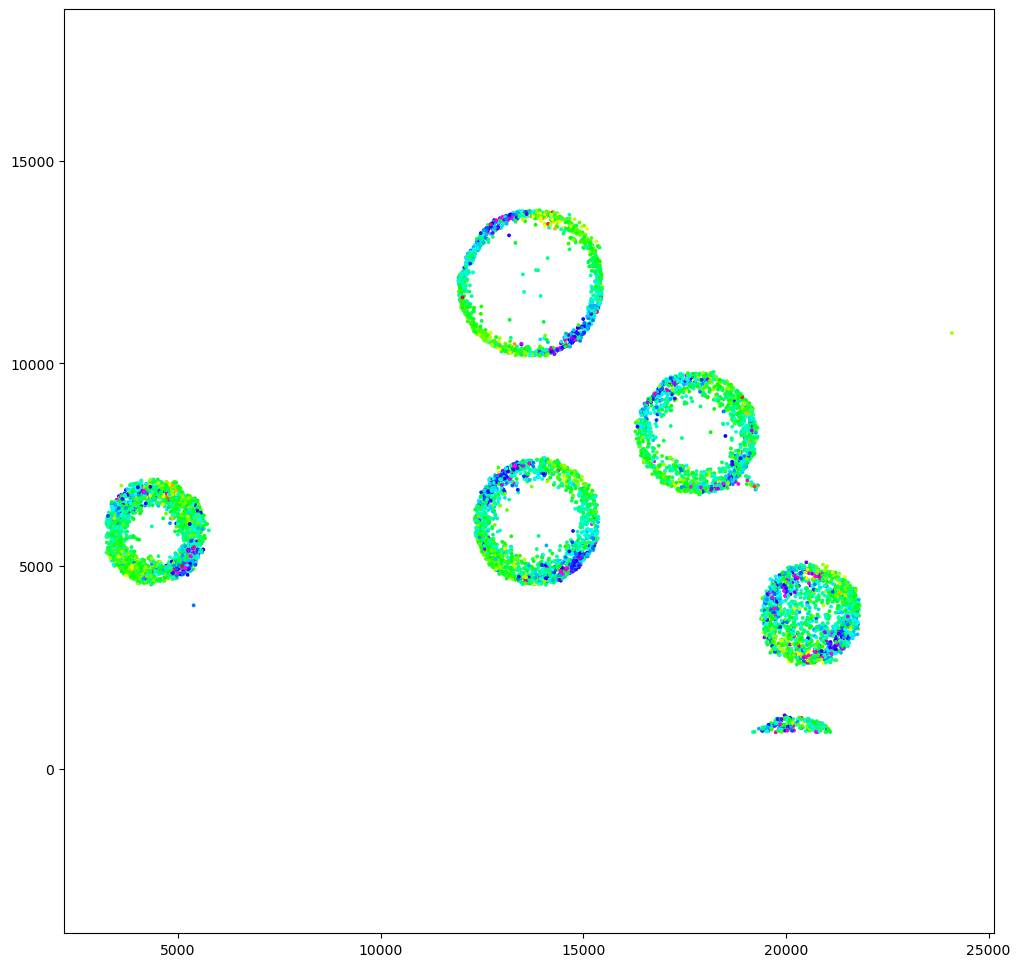

In [27]:
plt.rcParams['figure.figsize'] = [12,12]
hues = rho[threshold] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)

rgb_colors = hsv_to_rgb(hsv_colors)
print(rgb_colors)
plt.scatter(x[threshold] , y[threshold] , c = rgb_colors, s=3)
plt.axis('equal')


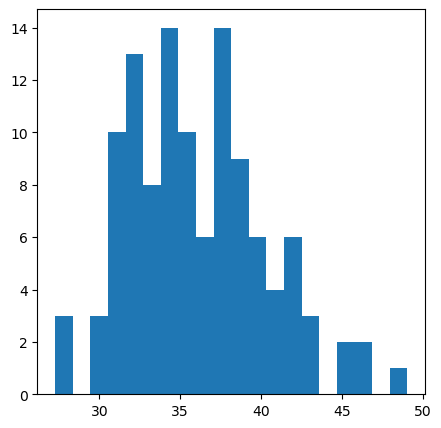

In [28]:
plt.rcParams['figure.figsize'] = [5,5]
op = plt.hist(offset_proj, bins=20)

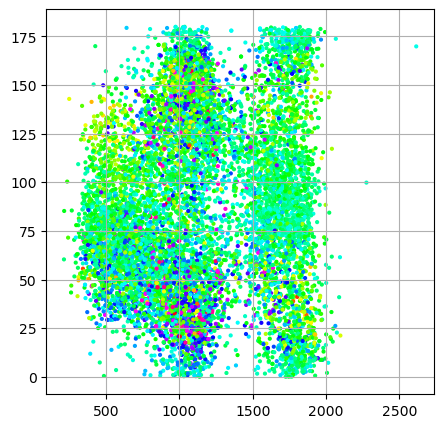

In [29]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(z[threshold], eta[threshold], c = rgb_colors, s=4)
plt.grid()

In [30]:
offset_polar = np.zeros(x[threshold].shape)
offset_polar[:] = np.nan
offset_polar[:offset_proj.shape[0]] = offset_proj

In [33]:
data = np.column_stack((
    frame[threshold], x[threshold], y[threshold], z[threshold], rho[threshold],
    eta[threshold], delta[threshold], N_photons[threshold], offset_polar, score[threshold],
    x_start[threshold], y_start[threshold], z_start[threshold],
    rho_start[threshold], delta_start[threshold]
))

# Save to CSV with many digits and proper header
# Ensure newline="" to avoid issues when reading in Excel
np.savetxt(
    "\\\\NAS_LOCCO\\Amaury\\DATA\\4_polar_MFM_these\\first_test_2_angles_free.csv",
    data,
    delimiter=";",
    header="frame;x;y;z;rho;eta;delta;N_photon;offset_polar;score;x_start;y_start;z_start;rho_start;delta_start",
    comments='',
    fmt='%.15f'
)